Capstone project

In [1]:
import numpy as np 
from bs4 import BeautifulSoup

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json 

from geopy.geocoders import Nominatim 

import requests 
from pandas.io.json import json_normalize 


import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

import folium 

In [2]:
address = 'London, England'

geolocator = Nominatim(user_agent="ld_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of London are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of London are 51.5073219, -0.1276474.


In [3]:
with open("ListofareasofLondon.html") as fp:
    soup = BeautifulSoup(fp, "lxml")
df= pd.DataFrame()
tb=soup.find("table",{"class":"wikitable sortable"})
i=0
for table in tb.find_all('tr'):
    row=table.text.split('\n')[1:4]
    if i==0:
        df=pd.DataFrame(columns=row)
    else:
        df.loc[i] = row
    i=i+1

df.drop(['Location', 'Post town'],axis=1,inplace=True)

j=0
for br in df.iloc[:,0]:
    elem=br.split('[')
    df.iloc[j,0]=elem[0]
    j=j+1


dfb=pd.DataFrame(columns=['Borough'])
dfb['Borough']=df.iloc[:,0].unique()
dfb.sort_values(by='Borough').reset_index(drop=True)

,Borough
0,Barking and Dagenham
1,Barnet
2,"Barnet, Brent, Camden"
3,"Barnet, Enfield"
4,Bexley
5,"Bexley, Greenwich"
6,"Bexley, Bromley"
7,"Bexley, Greenwich"
8,Brent
9,"Brent, Camden"


In [59]:
arealat=[]
arealon=[]

for ad in dfb.iloc[:,0]:
    address = ad+' ,London, England'
    geolocator = Nominatim(user_agent="ld_explorer")
    location = geolocator.geocode(address)
    if location==None:
        arealat.append('None')
        arealon.append('None')
    else:        
        arealat.append(location.latitude)
        arealon.append(location.longitude)
    
    
dfb['Latitude']=arealat
dfb['Longitude']=arealon

dfv=dfb[dfb.Latitude != 'None'].reset_index(drop=True)
dfv

,Borough,Latitude,Longitude
0,"Bexley, Greenwich",51.4512,0.0654129
1,"Ealing, Hammersmith and Fulham",51.4915,-0.214971
2,Croydon,51.3713,-0.101957
3,Bexley,51.4417,0.150488
4,Redbridge,51.5763,0.0454097
5,City,51.5156,-0.0919983
6,Westminster,51.4973,-0.137149
7,Brent,51.5848,-0.29918
8,Bromley,51.4028,0.0148142
9,Islington,51.5384,-0.0999051


In [5]:
CLIENT_ID = 'LVSCFKCJJ5TKYMEHN2X1G2TVEW5FD2IOEVM3OC2ZD1BPV33P' # your Foursquare ID
CLIENT_SECRET = 'A3MCJKJC2SMKMFRLJCMZQ4IML3WZRTE5LW4F0FL3TV3LTVQS' # your Foursquare Secret
VERSION = '20190409' # Foursquare API version

In [6]:
def getvenues(name, latitude, longitude, radius=300, categoryId='4d4b7105d754a06374d81259',limit=50):
    
    venues=[]
    for na, lat, lng in zip(name, latitude, longitude):
        print(na)
        
        url='https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}&limit={}'.format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        lng,
        radius,
        categoryId,
        limit)
        
        results = requests.get(url).json()["response"]['venues']
               
        venues.append([(
        na,
        lat,
        lng,
        v['name'],
        v['location']['lat'],
        v['location']['lng'],
        v['categories'][0]['name']) for v in results])
        
        
    brvenues=pd.DataFrame([item for venues in venues for item in venues])
    brvenues.columns=['Borough',
                     'Latitude',
                     'Longitude',
                     'Venue',
                     'Venue lat',
                     'Venue lng',
                     'Venue cat']
    
    return(brvenues)

In [7]:
ld_venues=getvenues(name=dfv['Borough'],
                   latitude=dfv['Latitude'],
                   longitude=dfv['Longitude'])
ld_venues

Bexley,  Greenwich 
Ealing, Hammersmith and Fulham
Croydon
Bexley
Redbridge
City
Westminster
Brent
Bromley
Islington
Havering
Barnet
Enfield
Wandsworth
Southwark
Barking and Dagenham
Richmond upon Thames
Newham
Sutton
Ealing
Lewisham
Harrow
Camden
Kingston upon Thames
Tower Hamlets
Greenwich
Haringey
Hounslow
Lambeth
Kensington and Chelsea,Hammersmith and Fulham
Waltham Forest
Redbridge, Barking and Dagenham
Kensington and Chelsea
Lambeth, Wandsworth
Barnet, Enfield
Merton
Hillingdon
Hackney
Dartford
Bexley, Greenwich
Islington & City
Haringey, Islington
Hammersmith and Fulham
Greenwich, Lewisham
Lambeth, Southwark
Brent, Harrow
Brent, Camden
Camden and Islington
Brent, Ealing
Harrow, Brent
Redbridge, Waltham Forest
Lewisham, Bromley
Lewisham, Southwark
City, Westminster


,Borough,Latitude,Longitude,Venue,Venue lat,Venue lng,Venue cat
0,"Bexley, Greenwich",51.451242,0.065413,Star Of India,51.450714,0.064183,Indian Restaurant
1,"Bexley, Greenwich",51.451242,0.065413,Azzuro,51.450844,0.063136,Italian Restaurant
2,"Ealing, Hammersmith and Fulham",51.491537,-0.214971,Metro Cafe,51.490358,-0.213403,Café
3,"Ealing, Hammersmith and Fulham",51.491537,-0.214971,C'est Ici,51.489962,-0.213148,Café
4,"Ealing, Hammersmith and Fulham",51.491537,-0.214971,Latymers,51.493110,-0.216629,Pub
5,"Ealing, Hammersmith and Fulham",51.491537,-0.214971,Reza Patisserie,51.493483,-0.212284,Bakery
6,"Ealing, Hammersmith and Fulham",51.491537,-0.214971,boulangerie cafe,51.489915,-0.213197,Café
7,"Ealing, Hammersmith and Fulham",51.491537,-0.214971,Broadway,51.490384,-0.218521,Indian Restaurant
8,"Ealing, Hammersmith and Fulham",51.491537,-0.214971,Green Leaf,51.493650,-0.216983,Coffee Shop
9,"Ealing, Hammersmith and Fulham",51.491537,-0.214971,Coffee Bean Cafe,51.493248,-0.218797,Coffee Shop


Count the number of venues for each borough.

In [14]:
ld_venues['count']=ld_venues.groupby('Borough')['Borough'].transform(pd.Series.count)
ld_venues.sort_values(by=['Borough','count'],ascending=False,inplace=True)
ld_venues_50=ld_venues.loc[ld_venues['count']==50]
ld_venues_50.reset_index(drop=True)

,Borough,Latitude,Longitude,Venue,Venue lat,Venue lng,Venue cat,count
0,Westminster,51.497321,-0.137149,Leon,51.497495,-0.136464,Fast Food Restaurant,50
1,Westminster,51.497321,-0.137149,Caffè Nero,51.497179,-0.137231,Coffee Shop,50
2,Westminster,51.497321,-0.137149,Benugo,51.497537,-0.136104,Deli / Bodega,50
3,Westminster,51.497321,-0.137149,Iris & June,51.496791,-0.136011,Coffee Shop,50
4,Westminster,51.497321,-0.137149,Coco di Mama,51.497025,-0.138959,Italian Restaurant,50
5,Westminster,51.497321,-0.137149,Jamie's Italian,51.497359,-0.137800,Italian Restaurant,50
6,Westminster,51.497321,-0.137149,Pure,51.497081,-0.138758,Salad Place,50
7,Westminster,51.497321,-0.137149,JOE & THE JUICE,51.497142,-0.138510,Juice Bar,50
8,Westminster,51.497321,-0.137149,The Albert,51.497604,-0.135645,Pub,50
9,Westminster,51.497321,-0.137149,Pret A Manger,51.497487,-0.135695,Sandwich Place,50


Number of unique categories.

In [15]:
len(ld_venues_50['Venue cat'].unique())

106

Count the number of venues of each category and plot the distribution of top 10 categories. 

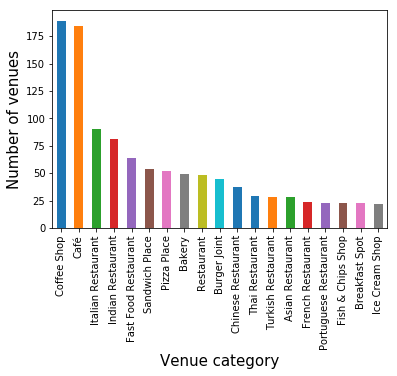

In [122]:
import matplotlib.pyplot as plt

cat_count=ld_venues.groupby('Venue cat').count().sort_values('Borough',ascending=False).Borough
cat_count=cat_count.iloc[:19]
cat_count.plot.bar(rot=90)
plt.ylabel('Number of venues', fontsize=15)
plt.xlabel('Venue category', fontsize=15)
plt.savefig('barplot.png',bbox_inches='tight')

One hot coding all the venue categories, and calculate the frequencies of each category in all neighborhoods.

In [91]:
ld_onehot=pd.get_dummies(ld_venues_50[['Venue cat']], prefix="", prefix_sep="")
ld_onehot['Borough']=ld_venues_50['Borough']

fixed_columns =[ld_onehot.columns[-1]]+list(ld_onehot.columns[:-1])
ld_onehot=ld_onehot[fixed_columns]

ld_grouped=ld_onehot.groupby('Borough').mean().reset_index()
ld_grouped.drop(ld_grouped[ld_grouped['Borough'] =='Camden and Islington'].index[0], inplace=True)
ld_grouped.drop(ld_grouped[ld_grouped['Borough'] =='Islington & City'].index[0], inplace=True)
ld_grouped.head()

,Borough,Acai House,African Restaurant,American Restaurant,Arcade,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bar,Beer Bar,Belgian Restaurant,Bistro,Boutique,Brazilian Restaurant,Breakfast Spot,Bubble Tea Shop,Buffet,Burger Joint,Burrito Place,Cafeteria,Café,Cantonese Restaurant,Caribbean Restaurant,Chinese Restaurant,Cocktail Bar,Coffee Shop,Creperie,Cupcake Shop,Currywurst Joint,Deli / Bodega,Dessert Shop,Dim Sum Restaurant,Diner,Doner Restaurant,Donut Shop,Eastern European Restaurant,English Restaurant,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Food,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Gastropub,German Restaurant,Greek Restaurant,Grocery Store,Halal Restaurant,Hotel,Ice Cream Shop,Indian Restaurant,Iraqi Restaurant,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Juice Bar,Kebab Restaurant,Korean Restaurant,Kurdish Restaurant,Latin American Restaurant,Lebanese Restaurant,Library,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,New American Restaurant,Noodle House,North Indian Restaurant,Office,Organic Grocery,Persian Restaurant,Peruvian Restaurant,Pie Shop,Pizza Place,Poke Place,Polish Restaurant,Portuguese Restaurant,Pub,Ramen Restaurant,Restaurant,Salad Place,Sandwich Place,Scandinavian Restaurant,Seafood Restaurant,Southern / Soul Food Restaurant,Souvlaki Shop,Spanish Restaurant,Steakhouse,Sushi Restaurant,Tapas Restaurant,Tea Room,Thai Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Wings Joint
0,Bromley,0.0,0.0,0.00,0.0,0.04,0.00,0.00,0.04,0.00,0.00,0.02,0.00,0.0,0.0,0.00,0.0,0.0,0.02,0.02,0.00,0.18,0.0,0.00,0.00,0.00,0.16,0.0,0.00,0.00,0.00,0.00,0.00,0.04,0.00,0.02,0.0,0.00,0.0,0.0,0.08,0.02,0.0,0.0,0.00,0.04,0.02,0.02,0.0,0.02,0.00,0.0,0.00,0.0,0.00,0.0,0.02,0.00,0.0,0.0,0.0,0.02,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.02,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.02,0.0,0.0,0.02,0.00,0.00,0.04,0.00,0.06,0.00,0.00,0.00,0.0,0.00,0.00,0.04,0.0,0.00,0.00,0.02,0.00,0.00,0.00,0.0
1,Camden,0.0,0.0,0.02,0.0,0.02,0.00,0.00,0.04,0.00,0.02,0.00,0.02,0.0,0.0,0.02,0.0,0.0,0.00,0.00,0.02,0.10,0.0,0.06,0.04,0.00,0.10,0.0,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.04,0.02,0.0,0.0,0.00,0.00,0.04,0.02,0.0,0.00,0.00,0.0,0.02,0.0,0.00,0.0,0.04,0.04,0.0,0.0,0.0,0.06,0.02,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.02,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.04,0.06,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.0,0.00,0.00,0.00,0.0,0.02,0.00,0.00,0.04,0.02,0.00,0.0
3,City,0.0,0.0,0.00,0.0,0.02,0.02,0.00,0.02,0.02,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.02,0.00,0.00,0.00,0.0,0.00,0.00,0.02,0.20,0.0,0.00,0.00,0.02,0.00,0.02,0.00,0.00,0.00,0.0,0.04,0.0,0.0,0.02,0.00,0.0,0.0,0.02,0.00,0.00,0.02,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.02,0.0,0.0,0.0,0.06,0.04,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.02,0.0,0.00,0.02,0.00,0.00,0.0,0.0,0.0,0.02,0.00,0.00,0.0,0.0,0.02,0.00,0.00,0.02,0.04,0.10,0.02,0.02,0.00,0.0,0.00,0.04,0.02,0.0,0.00,0.02,0.02,0.00,0.04,0.00,0.0
4,"City, Westminster",0.0,0.0,0.02,0.0,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.06,0.02,0.00,0.08,0.0,0.00,0.00,0.00,0.12,0.0,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.04,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.02,0.0,0.00,0.0,0.02,0.0,0.02,0.00,0.0,0.0,0.0,0.06,0.02,0.0,0.02,0.02,0.0,0.0,0.02,0.0,0.00,0.0,0.06,0.0,0.00,0.00,0.00,0.02,0.0,0.0,0.0,0.00,0.00,0.08,0.0,0.0,0.00,0.04,0.02,0.06,0.00,0.04,0.00,0.00,0.00,0.0,0.02,0.02,0.00,0.0,0.02,0.02,0.00,0.00,0.00,0.02,0.0
5,Ealing,0.0,0.0,0.00,0.0,0.02,0.00,0.02,0.02,0.00,0.00,0.00,0.02,0.0,0.0,0.00,0.0,0.0,0.06,0.00,0.00,0.06,0.0,0.02,0.00,0.00,0.22,0.0,0.00,0.00,0.00,0.02,0.00,0.00,0.02,0.00,0.0,0.02,0.0,0.0,0.04,0.00,0.0,0.0,0.00,0.00,0.00,0.02,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.02,0.00,0.0,0.0,0.0,0.08,0.00,0.0,0.00,0.02,0.0,0.0,0.00

Function to sort the venues in each borough in descending order.

In [22]:
def return_most_common_venues(row, num_top_venues):
    row_cat = row.iloc[1:]
    row_cat_sorted = row_cat.sort_values(ascending=False)
    return row_cat_sorted.index.values[0:num_top_venues]

In [140]:
num_top_venues=10

indicator=['st', 'nd', 'rd']
columns=['Borough', 'Latitude', 'Longitude']

for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} most common cat'.format(ind+1, indicators[ind]))
    except:
        columns.append('{} most common cat'.format(ind+1))
        
ld_venues_sorted = pd.DataFrame(columns=columns)
ld_venues_sorted['Borough'] = ld_grouped['Borough']


for ind in np.arange(ld_grouped.shape[0]):
    ld_venues_sorted.iloc[ind,3:]=return_most_common_venues(ld_grouped.iloc[ind,:], num_top_venues)
    ld_venues_sorted.iloc[ind,1:3]=dfv.iloc[int(dfv[dfv['Borough']==ld_venues_sorted.iloc[ind,0]].index[0]),1:3]

ld_venues_sorted.reset_index(drop=True)

,Borough,Latitude,Longitude,1 most common cat,2 most common cat,3 most common cat,4 most common cat,5 most common cat,6 most common cat,7 most common cat,8 most common cat,9 most common cat,10 most common cat
0,Bromley,51.4028,0.0148142,Café,Coffee Shop,Fast Food Restaurant,Sandwich Place,Food Stand,Asian Restaurant,Sushi Restaurant,Bakery,Diner,Restaurant
1,Camden,51.5423,-0.13956,Coffee Shop,Café,Caribbean Restaurant,Italian Restaurant,Pizza Place,Bakery,Fast Food Restaurant,Ice Cream Shop,Indian Restaurant,Chinese Restaurant
2,City,51.5156,-0.0919983,Coffee Shop,Sandwich Place,Italian Restaurant,Salad Place,English Restaurant,Steakhouse,Japanese Restaurant,Vietnamese Restaurant,Deli / Bodega,Mexican Restaurant
3,"City, Westminster",51.5073,-0.127647,Coffee Shop,Café,Pizza Place,Mexican Restaurant,Burger Joint,Italian Restaurant,Restaurant,Pub,Fast Food Restaurant,Sandwich Place
4,Ealing,51.5127,-0.305195,Coffee Shop,Italian Restaurant,Burger Joint,Café,Restaurant,Thai Restaurant,Fast Food Restaurant,Pizza Place,English Restaurant,Pub
5,Hammersmith and Fulham,51.492,-0.22364,Coffee Shop,Café,Sushi Restaurant,Burger Joint,Burrito Place,Sandwich Place,Breakfast Spot,Italian Restaurant,Japanese Restaurant,Turkish Restaurant
6,Haringey,51.5879,-0.10541,Café,Indian Restaurant,Bakery,Coffee Shop,Fast Food Restaurant,African Restaurant,Fried Chicken Joint,Pizza Place,Restaurant,Malay Restaurant
7,"Haringey, Islington",51.5689,-0.109323,Café,Coffee Shop,Pizza Place,Vietnamese Restaurant,Italian Restaurant,Indian Restaurant,Caribbean Restaurant,Sandwich Place,Deli / Bodega,Mexican Restaurant
8,Havering,51.5444,-0.144303,Café,Food Truck,Coffee Shop,Vegetarian / Vegan Restaurant,Italian Restaurant,Breakfast Spot,Fried Chicken Joint,Burger Joint,Ice Cream Shop,Grocery Store
9,Islington,51.5384,-0.0999051,Italian Restaurant,French Restaurant,Coffee Shop,Cocktail Bar,Mediterranean Restaurant,Bakery,Burger Joint,Middle Eastern Restaurant,Indian Restaurant,Gastropub


Run k-mean method to clustr the neighborhoods into 3 clusters.

In [141]:
from sklearn.cluster import KMeans

kcluster=3

ld_grouped_cluster=ld_grouped.drop('Borough', 1)

kmeans= KMeans (n_clusters=kcluster, random_state=0).fit(ld_grouped_cluster)
print(kmeans.labels_)

ld_venues_sorted.insert(0, 'Cluster labels', kmeans.labels_)

ld_venues_sorted.sort_values(by=['Cluster labels'],ascending=True)
ld_venues_sorted.reset_index(drop=True).to_csv('London_top_venues.csv', sep='\t', encoding='utf-8')

[0 0 1 1 1 1 0 0 0 2 2 1 0 0 1 1 1]


Visualize the locaiton of 3 clusters on map.

In [142]:
import matplotlib.cm as cm
import matplotlib.colors as colors

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

x = np.arange(kcluster)
y = [i+x+(i*x)**2 for i in range(kcluster)]
color_array = cm.rainbow(np.linspace(0,1,kcluster))
rainbow = [colors.rgb2hex(i) for i in color_array]

markers_colors=[]

for lat, lng, br, cluster in zip(ld_venues_sorted['Latitude'], ld_venues_sorted['Longitude'], ld_venues_sorted['Borough'], ld_venues_sorted['Cluster labels']):
    label=folium.Popup(str(br)+' Cluster '+str(cluster), parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    radius=5,
    popup=label,
    color=rainbow[cluster-1],
    fill=True,
    fill_color=rainbow[cluster-1],
    fill_opacity=0.6).add_to(map_clusters)
    
map_clusters